In [1]:
from sage.plot.colors import rainbow

## Finite Field Dynamics

In this notebook we will study polynomial dynamics in finite fields. We will first study polynomial dynamics in a given finite field $F_q$, that is, given a finite field $K = F_q$ and a function $p: K \to K$, what can we say about the sequences of elements of $K$ given by $x, \ p(x), \ p(p(x)),...$


First we need to define our field:

In [2]:
K.<a> = GF(27,'a') ##first we define the finite field
K

Finite Field in a of size 3^3

We will use the layout of this graph to have a better visualization of functions

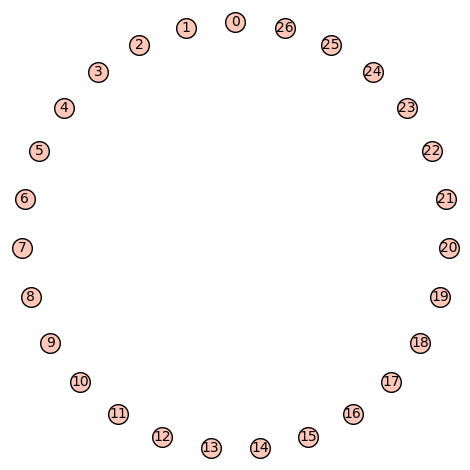

In [3]:
Q = DiGraph()
Q.add_vertices([i for i in range(len(K))])
Q.plot(save_pos=True,layout='circular') ##this will be used later, its for better visualization

In [4]:
order(K)
elements = [x for x in K]
elements ##the elements of K

[0,
 a,
 a^2,
 a + 2,
 a^2 + 2*a,
 2*a^2 + a + 2,
 a^2 + a + 1,
 a^2 + 2*a + 2,
 2*a^2 + 2,
 a + 1,
 a^2 + a,
 a^2 + a + 2,
 a^2 + 2,
 2,
 2*a,
 2*a^2,
 2*a + 1,
 2*a^2 + a,
 a^2 + 2*a + 1,
 2*a^2 + 2*a + 2,
 2*a^2 + a + 1,
 a^2 + 1,
 2*a + 2,
 2*a^2 + 2*a,
 2*a^2 + 2*a + 1,
 2*a^2 + 1,
 1]

In [5]:
def p(l): ##in case we want to define a polynomial based on its coefficients
    def P(x):
        return sum([l[i]*x^i for i in range(len(l))])
    return P

In [6]:
#H = DiGraph()
#H.add_vertices(G.vertices())
#H.add_edges(G.edges())
#H.plot().matplotlib(title = 'Dynamics')
#ax = plot(H.plot(layout='circular',vertex_size=1000,vertex_color='lightgreen'))
#ax.show(title_pos= (1,1),title='Dynamics')
#H.edges()

For every function $p$, we will need the same base graph $G$ to visualize $p$. This function returns this graph.

In [7]:
def graphField(K): ##this function returns a graph of elements of K
    n = order(K)
    l = [x for x in K]
    G = DiGraph(loops=True)
    T = [str(x) for x in l]
    G.add_vertices(T)
    return G

The vertices of our base graph $G$ and the elements of our field $K$ are not in the same order yet, this will take care of it.

In [8]:
elements = [x for x in K]
vs = graphField(K).vertices()
newelements = []


In [9]:
for i in range(len(elements)):
    if str(elements[i]) != vs[i]:
        for b in elements:
            #print(str(b))
            if str(b) == vs[i]:
                newelements.append(b)
            #print(n)
    else:
        newelements.append(elements[i])
newelements ##we need to reorder the elements of K

[0,
 1,
 2,
 2*a,
 2*a + 1,
 2*a + 2,
 2*a^2,
 2*a^2 + 1,
 2*a^2 + 2,
 2*a^2 + 2*a,
 2*a^2 + 2*a + 1,
 2*a^2 + 2*a + 2,
 2*a^2 + a,
 2*a^2 + a + 1,
 2*a^2 + a + 2,
 a,
 a + 1,
 a + 2,
 a^2,
 a^2 + 1,
 a^2 + 2,
 a^2 + 2*a,
 a^2 + 2*a + 1,
 a^2 + 2*a + 2,
 a^2 + a,
 a^2 + a + 1,
 a^2 + a + 2]

In [10]:
def plotGraph(G,vertexsize=1000,vertexcolor='lightgreen',lay='circular'): 
    return G.plot(vertex_size=vertexsize, layout=lay,vertex_color=vertexcolor)

Now that we have our base graph $G$, we need a function that gives us the sequences $x, \ p(x), \ p(p(x)),...$

In [11]:
def rightEdges(G): ##this will give us the cycles and transient elements
    l = []
    for edge in G.edges():
        if (edge[1],edge[0],None) not in G.edges():
            l.append(edge)
    return l

Since our field is finite, we know that in finite time, every sequence will turn into a periodic cycle, this next function runs the polynomial until we get to that cycle

In [12]:
def dynamics(K,f,c): ##this function returns the information we want
    G = graphField(K)
    edges = []
    z0 = c
    znext = f(z0)
    G.add_edge(str(z0),str(znext))
    while (str(f(z0)),str(f(znext)),None) not in G.edges():
        z0 = znext
        znext = f(znext)
        G.add_edge(str(z0),str(znext))
    return G
    

In [13]:
def makeimages(K, f, c, figuresize = (10,10), vertexsize = 1000, vertexcolor = 'lightgreen', lay = 'circular', colorcicles = 'red', initial = 'blue'):
    ciclos = dynamics(K, f, c).all_simple_cycles()[0]
    ciclos = list(set(ciclos))
    ims = []
    G = graphField(K)
    #G.set_pos(Q.get_pos())
    ims.append(G.plot(figsize = figuresize, layout = lay ,vertex_size=vertexsize,vertex_color = vertexcolor))
    for edge in rightEdges(dynamics(K,f,c)):
        G.add_edge(edge)
        ims.append(G.plot(figsize = figuresize, layout = lay,vertex_size = vertexsize, vertex_color = vertexcolor))
    G.remove_loops()
    ims[-1] = G.plot(figsize = figuresize, layout = lay, vertex_size=vertexsize,
                     vertex_color = vertexcolor,vertex_colors = {colorcicles : ciclos, initial :[str(c)]})
    return ims

As an example, let's check all the orbits and possible cycles of the function $g(z) = (a^2 + a + 2)z^2 + a^2 + a + 1$ in $K = F_{27}$

In [14]:
def g(z):
    return newelements[-1]*z^2 + newelements[-2] 

This will make a list of images that we will use to make the animation

In [15]:
qs = []
for c in newelements:
    print(str(c))
    qs.append(makeimages(K,g,c,figuresize=(7,7))[-1])


0
1
2
2*a
2*a + 1
2*a + 2
2*a^2
2*a^2 + 1
2*a^2 + 2
2*a^2 + 2*a
2*a^2 + 2*a + 1
2*a^2 + 2*a + 2
2*a^2 + a
2*a^2 + a + 1
2*a^2 + a + 2
a
a + 1
a + 2
a^2
a^2 + 1
a^2 + 2
a^2 + 2*a
a^2 + 2*a + 1
a^2 + 2*a + 2
a^2 + a
a^2 + a + 1
a^2 + a + 2


In [16]:
anim = animate(qs)

Animation with 27 frames
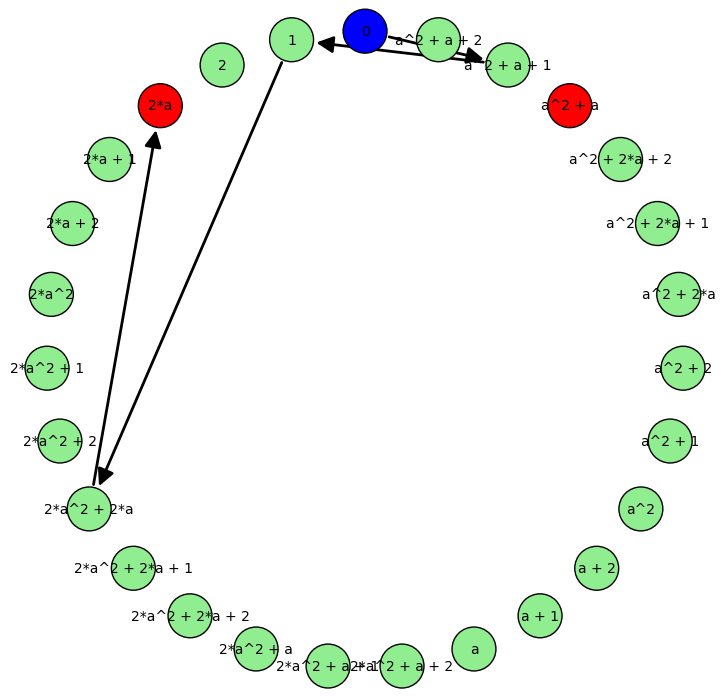

In [17]:
anim.show(delay=100)

Here we are plotting every possible sequence (that is, we are iterating $g$ starting from every possible element in $K$). The blue vertice is the starting point, the arrows indicate the path we get by iterating $g$ and the red vertices indicate the cycle the sequence converges to.

In [18]:
## more examples
#def f(z): 
#    return z

#cs = []
#for c in newelements:
    #print(str(c))
#    cs.append(makeimages(K,f,c,figuresize=(7,7))[-1])
#anim = animate(cs)
#anim.show(delay=100)

Now we will try to study the behaviour of a given family of polynomials of the form $p(x) = ax^2 + b$, where $a,b \in F_q$ and this time we will vary our base field.


The first properties we will try to study are the number of cycles and the length of such cycles.

First we will need a function that gets us every finite field with less than $n$ elements.

In [19]:
def makefields(n,skip=False):
    ks = []
    if skip == False:
        for i in range(2,n):
            try: 
                K.<a> = GF(i,'a')
                ks.append(K)
            except:
                pass
    else:
        for i in range(3,n,2):
            try: 
                K.<a> = GF(i,'a')
                ks.append(K)
            except:
                pass
    return ks

In [20]:
cores = [Color(i/255, i/255, i/255) for i in range(1,37)]

In [21]:
cores = rainbow(11, 'hex')
cores

['#ff0000',
 '#ff8b00',
 '#e7ff00',
 '#5cff00',
 '#00ff2e',
 '#00ffb9',
 '#00b9ff',
 '#002eff',
 '#5c00ff',
 '#e700ff',
 '#ff008b']

In [22]:
def cycles(G):
    return list(set(G.all_simple_cycles()[0]))
def f(z):
    return z**2 + 1
def imagesvaryq(n,f, vertexcolor = 'lightgreen', skip=False,lay='circular',figuresize=(10,10), cores=cores):
    ciclos = []
    graphs = []
    ks = makefields(n,skip)
    for k in ks:
        elements = [x for x in k]
        cic = []
        for c in elements:
            if cycles(dynamics(k,f,c)) not in cic:
                cic.append(cycles(dynamics(k,f,c)))
            else:
                continue
        ciclos.append(cic)
        g = graphField(k)
        graphs.append(g)
    dics = []
    cores = rainbow(len(ciclos)+1, 'hex')
    for i in range(len(ciclos)):
        dics.append({cores[:len(ciclos[i])][j] : ciclos[i][j] for j in range(len(ciclos[i]))})
    qs = []
    for g in graphs:
        qs.append(g.plot(vertex_labels=False, vertex_color = vertexcolor, vertex_colors = dics[graphs.index(g)],layout = lay,figsize=figuresize))
    return qs

In [23]:
#listcolors.keys()

In [24]:
ciclos = []
graphs = []
for k in makefields(10):
    elements = [x for x in k]
    cic = []
    for c in elements:
        if cycles(dynamics(k,f,c)) not in cic:
            cic.append(cycles(dynamics(k,f,c)))
        else:
            continue
    ciclos.append(cic)
    g = graphField(k)
    graphs.append(g)

ciclos
#dynamics(makefields(10)[-1],f,1)
#makefields(10)[-1]
    #graphs[-1].plot(vertex_colors = dic)

[[['0', '1']],
 [['2']],
 [['0', '1'], ['a'], ['a + 1']],
 [['0', '2', '1']],
 [['5'], ['3']],
 [['0', '1'], ['a', 'a + 1', 'a^2 + a', 'a^2 + 1', 'a^2', 'a^2 + a + 1']],
 [['2'], ['2*a', 'a + 2']]]

In [25]:
qs = imagesvaryq(100,f)
anim = animate(qs)


Animation with 35 frames
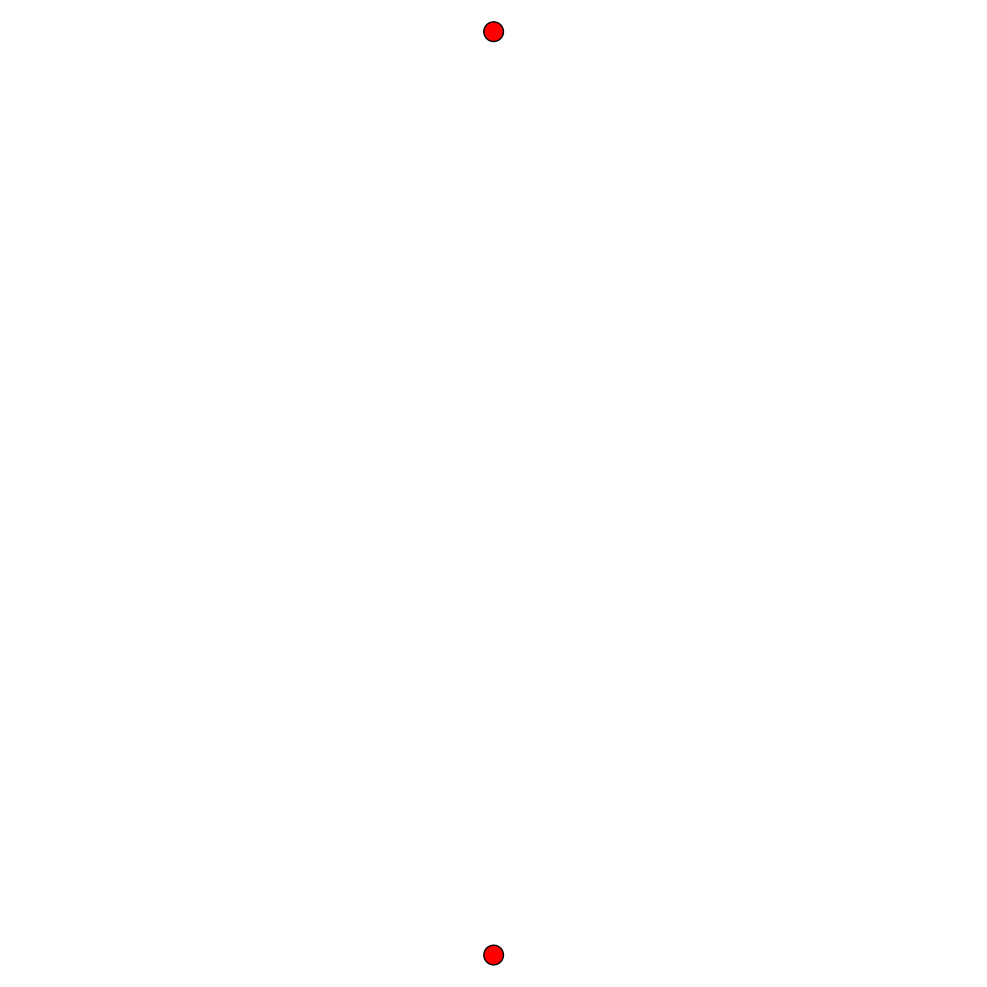

In [26]:
anim.show(delay=100)